# Projeto Final

## Parte 1

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

### Cria dataframe com apenas os atributos "category", "type" e "value"

In [72]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'

df_chosen = df[['category', 'type', 'value']].copy()
df_chosen

,category,type,value
0,Network activity,url,http://api.holycrossservices.info/dri/donate.php
1,Network activity,ip-dst,176.103.56.36
2,Network activity,hostname,api.holycrossservices.info
3,Network activity,url,http://api.holycrossservices.net/dri/donate.php
4,Network activity,hostname,api.holycrossservices.org
...,...,...,...
138719,Network activity,domain,rimpro.ru
138720,Network activity,domain,techboss.net
138721,Network activity,domain,tommylam.com
138722,Network activity,domain,trudprom.ru


### Mapeia strings de categorias para indices inteiros

In [73]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['category'].unique()))))])
df_chosen['category_index'] = df['category'].map(d)
d

{'Antivirus detection': 1,
 'Artifacts dropped': 2,
 'Attribution': 3,
 'External analysis': 4,
 'Financial fraud': 5,
 'Internal reference': 6,
 'Network activity': 7,
 'Other': 8,
 'Payload delivery': 9,
 'Payload installation': 10,
 'Payload type': 11,
 'Persistence mechanism': 12,
 'Targeting data': 13}

### Mapeia string de tipos para indices inteiros

In [74]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['type'].unique()))))])
df_chosen['type_index'] = df['type'].map(d)
d

{'AS': 1,
 'attachment': 2,
 'btc': 3,
 'campaign-id': 4,
 'campaign-name': 5,
 'comment': 6,
 'domain': 7,
 'domain|ip': 8,
 'email-attachment': 9,
 'email-dst': 10,
 'email-src': 11,
 'email-subject': 12,
 'filename': 13,
 'filename|md5': 14,
 'filename|sha1': 15,
 'filename|sha256': 16,
 'hostname': 17,
 'imphash': 18,
 'ip-dst': 19,
 'ip-src': 20,
 'link': 21,
 'malware-sample': 22,
 'md5': 23,
 'mutex': 24,
 'named pipe': 25,
 'other': 26,
 'pattern-in-file': 27,
 'pattern-in-memory': 28,
 'pattern-in-traffic': 29,
 'pdb': 30,
 'pehash': 31,
 'prtn': 32,
 'regkey': 33,
 'regkey|value': 34,
 'sha1': 35,
 'sha256': 36,
 'snort': 37,
 'ssdeep': 38,
 'target-location': 39,
 'target-machine': 40,
 'target-org': 41,
 'target-user': 42,
 'text': 43,
 'threat-actor': 44,
 'uri': 45,
 'url': 46,
 'user-agent': 47,
 'vulnerability': 48,
 'whois-creation-date': 49,
 'whois-registrant-email': 50,
 'whois-registrant-name': 51,
 'whois-registrant-phone': 52,
 'whois-registrar': 53,
 'windows-sc

### Cria dataframe apenas com indices das categorias e dos tipos

In [75]:
df_selected = df_chosen[['category_index', 'type_index']].copy()
df_selected

,category_index,type_index
0,7,46
1,7,19
2,7,17
3,7,46
4,7,17
...,...,...
138719,7,7
138720,7,7
138721,7,7
138722,7,7


### Separa o dataset nas porções 80/20

In [76]:
df_shuffle = shuffle(df_selected, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

## Parte 2

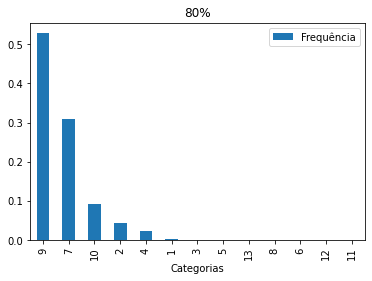

In [77]:
plot_df_80 = pd.DataFrame({
    'Categorias': df_80['category_index'].unique(),
    'Frequência': df_80['category_index'].value_counts(normalize=True)
})
plot_df_80.plot(x ='Categorias', y='Frequência', kind = 'bar', title='80%')

plt.show()

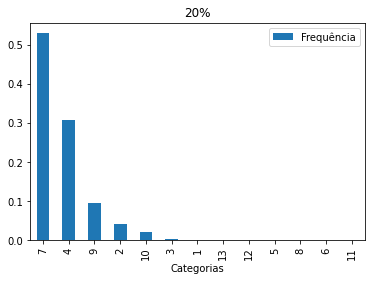

In [78]:
plot_df_20 = pd.DataFrame({
    'Categorias': df_20['category_index'].unique(),
    'Frequência': df_20['category_index'].value_counts(normalize=True)
})
plot_df_20.plot(x ='Categorias', y='Frequência', kind = 'bar', title='20%')

plt.show()

## Parte 3

## KNN

In [106]:
df_80['category_index'].value_counts()

7     58670
9     34380
4     10187
2      4797
10     2437
3       226
1       140
13       62
8        42
5        19
12       12
6         7
11        1
Name: category_index, dtype: int64

In [107]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error

### Separando o conjunto de dados de treinamento e teste, sendo 80% para treino e 20% para teste

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2)

### Executando o KNN, o método predict tenta prever os valores para os dados de teste

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train, y_train)
resultado = model.predict(X_test)
resultado

array([7, 9, 9, ..., 9, 7, 7], dtype=int64)

### Cria matriz de confusão

Exemplo: dos 27 valores que o modelo previu como sendo da categoria 1, todos os 27 foram classificados corretamente

In [110]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   2   3     4  5      7  8     9  12  13    All
Real                                                   
1         0   0    37  0      0  0     0   0   0     37
2        48   0     0  0      0  0   914   1   0    963
3         0  26    18  0      1  0     0   0   0     45
4         0   0  1642  0     15  0   377   0   0   2034
5         0   0     0  5      0  0     0   0   0      5
7         0   0     2  0  11672  0     0   0   0  11674
8         0   0     7  0      0  2     0   0   0      9
9         0   0     2  0     16  0  6928   0   0   6946
10        0   0     0  0      0  0   468   0   0    468
12        0   0     0  0      0  0     1   1   0      2
13        0   0     1  0      0  0     0   0  12     13
All      48  26  1709  5  11704  2  8688   2  12  22196


### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [111]:
mean_squared_error(y_test, resultado)

2.505631645341503

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [112]:
model.score(X_test,y_test)

0.9162011173184358

## Random Forest

### Treinando o algoritmo e gerando o modelo

In [113]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=1)
tree_rf = RandomForestRegressor()

model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

### Matrizes de confusão

In [114]:
print (pd.crosstab(y_test,resultado_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  2.0  2.009333333333333  2.2550376112798  2.495830250177995  3.0  \
Real                                                                       
1          0                  0                0                  0    0   
2         20                  2               22                  2    0   
3          0                  0                0                  0   30   
4          0                  0                0                  0    0   
5          0                  0                0                  0    0   
6          0                  0                0                  0    0   
7          1                  0                0                  0    0   
8          0                  0                0                  0    0   
9          0                  0                2                  2    0   
10         0                  0                0                  0    0   
12         0                  0                0                  0    0   
13         0

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [115]:
mean_squared_error(y_test, resultado_rf)

2.0639246561090294

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [116]:
model_rf.score(X_test,y_test)

0.38708522147955104

## Perceptron

In [117]:
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=30)
perc = Perceptron()

model_perc = perc.fit(X_train, y_train)
resultado_perc = model_perc.predict(X_test)
resultado_perc

array([7, 9, 7, ..., 7, 9, 7], dtype=int64)

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [118]:
mean_squared_error(y_test, resultado_perc)

3.8952513966480447

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [119]:
model_perc.score(X_test,y_test)

0.6053793476302036

In [120]:
print (pd.crosstab(y_test,resultado_perc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      7     9    All
Real                       
1            0    27     27
2          406   532    938
3            1    34     35
4         1695   361   2056
5            4     0      4
6            1     0      1
7        10618  1039  11657
8            5     2      7
9         4123  2819   6942
10         200   314    514
11           0     1      1
12           0     3      3
13           0    11     11
All      17053  5143  22196


## Parte 4

In [121]:
df_20['category_index'].value_counts()

7     14714
9      8533
4      2621
2      1144
10      607
3        60
1        31
13       15
5         6
8         5
12        5
6         3
11        1
Name: category_index, dtype: int64

In [122]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(df_20.drop('category_index',axis=1),df_20['category_index'])

In [123]:
knn_20 = model.predict(X_test_20)
tree_rf_20 = model_rf.predict(X_test_20)
perc_20 =  model_perc.predict(X_test_20)

In [138]:
mean_squared_error(y_test_20, knn_20)

0.0

In [139]:
mean_squared_error(y_test_20, tree_rf_20)

0.4074194770092102

In [140]:
mean_squared_error(y_test_20, perc_20)

1.918985152083033

## Conclusão

- Observando todas as métricas obtidas, o algoritmo KNN é, num geral, a melhor opção para o dataset escolhido, visto que possui menor taxa de erro e maior taxa de score.
- Sobre o dataset em geral, acredito não ter sido a melhor escolha, visto que a pouca quantidade de atributos faz com que não possam ser feitas muitas análises e os algoritmos de Machine Learning parecem quase uma técnica mais avançada que o necessário para estes dados